In [1]:
import pandas as pd
import networkx as nx
df = pd.read_csv("rate.csv")

In [2]:
df.head()

From       To  Rate
0    ROMUL  AMBROSE     2
1    ROMUL    PETER     3
2    ROMUL   ALBERT     1
3  BONAVEN    ROMUL     3
4  BONAVEN   VICTOR     2

In [3]:
G_panda = nx.from_pandas_edgelist(df, 'From', 'To', edge_attr= 'Rate', create_using = nx.DiGraph())

In [4]:
create_using = nx.DiGraph()
pos = nx.shell_layout(G_panda)

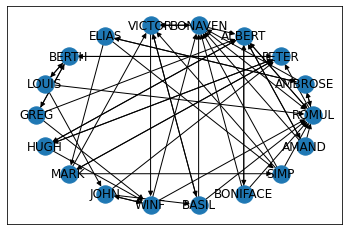

In [5]:
nx.draw_networkx(G_panda, pos, with_labels = True)

In [6]:
G_panda.degree()

DiDegreeView({'ROMUL': 12, 'AMBROSE': 5, 'PETER': 8, 'ALBERT': 10, 'BONAVEN': 10, 'VICTOR': 7, 'ELIAS': 4, 'BERTH': 6, 'LOUIS': 4, 'GREG': 4, 'HUGH': 5, 'MARK': 5, 'JOHN': 5, 'WINF': 7, 'BASIL': 5, 'BONIFACE': 4, 'SIMP': 5, 'AMAND': 4})

In [7]:
indegreeview = G_panda.in_degree()
print(indegreeview)

[('ROMUL', 9), ('AMBROSE', 2), ('PETER', 5), ('ALBERT', 6), ('BONAVEN', 7), ('VICTOR', 4), ('ELIAS', 1), ('BERTH', 3), ('LOUIS', 1), ('GREG', 1), ('HUGH', 2), ('MARK', 2), ('JOHN', 2), ('WINF', 4), ('BASIL', 2), ('BONIFACE', 1), ('SIMP', 2), ('AMAND', 1)]


In [8]:
indegree = ''
for employee in indegreeview:
    if indegree == '':
        indegree = employee
    else:
        if employee[1] > indegree[1]:
            indegree = employee
print ('The employee that was rated the most was: ' + indegree[0])

The employee that was rated the most was: ROMUL


In [9]:
outdegreeview = G_panda.out_degree()

In [10]:
outdegree = ''
for employee in outdegreeview:
    if outdegree == '':
        outdegree = employee
    else:
        if employee[1] > outdegree[1]:
            outdegree = employee
print ('The employee that rated the most was: ' + outdegree[0])

The employee that rated the most was: ALBERT


In [11]:
listOfAvgRates = {}
for index, row in df.iterrows():
    if row['To'] not in listOfAvgRates:
        listOfAvgRates[row['To']] = 0
    listOfAvgRates[row['To']] += row['Rate']

highestRated = ''
lowestRated = ''
for employee in indegreeview:
    listOfAvgRates[employee[0]] /= employee[1]
    if highestRated == '':
        highestRated = employee[0]
        lowestRated = employee[0]
    else:
        if listOfAvgRates[employee[0]] > listOfAvgRates[highestRated]:
            highestRated = employee[0]
        if listOfAvgRates[employee[0]] < listOfAvgRates[lowestRated]:
            lowestRated = employee[0]
            
print(listOfAvgRates)
print('\nThe highest rated employee is: ' + highestRated)
print('\nThe lowest rated employee is: ' + lowestRated)

{'AMBROSE': 2.5, 'PETER': 2.6, 'ALBERT': 1.3333333333333333, 'ROMUL': 2.3333333333333335, 'VICTOR': 1.75, 'BONAVEN': 2.2857142857142856, 'ELIAS': 1.0, 'LOUIS': 1.0, 'GREG': 2.0, 'BERTH': 3.0, 'HUGH': 1.5, 'MARK': 1.5, 'JOHN': 1.5, 'WINF': 1.5, 'BASIL': 2.0, 'SIMP': 2.0, 'BONIFACE': 2.0, 'AMAND': 2.0}

The highest rated employee is: BERTH

The lowest rated employee is: ELIAS
